In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
# Parameters and variables: 
results_folder = 'D:\\roast-chapter3\\wp_all_results\\' # Folder with results
main_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\' # Project folder

# Datasets names and subjects lists
db_names = ['wp2a', 'wp1a', 'wp1b']

Text(0, 0.5, 'Current Density J [$Am^{-2}$] median')

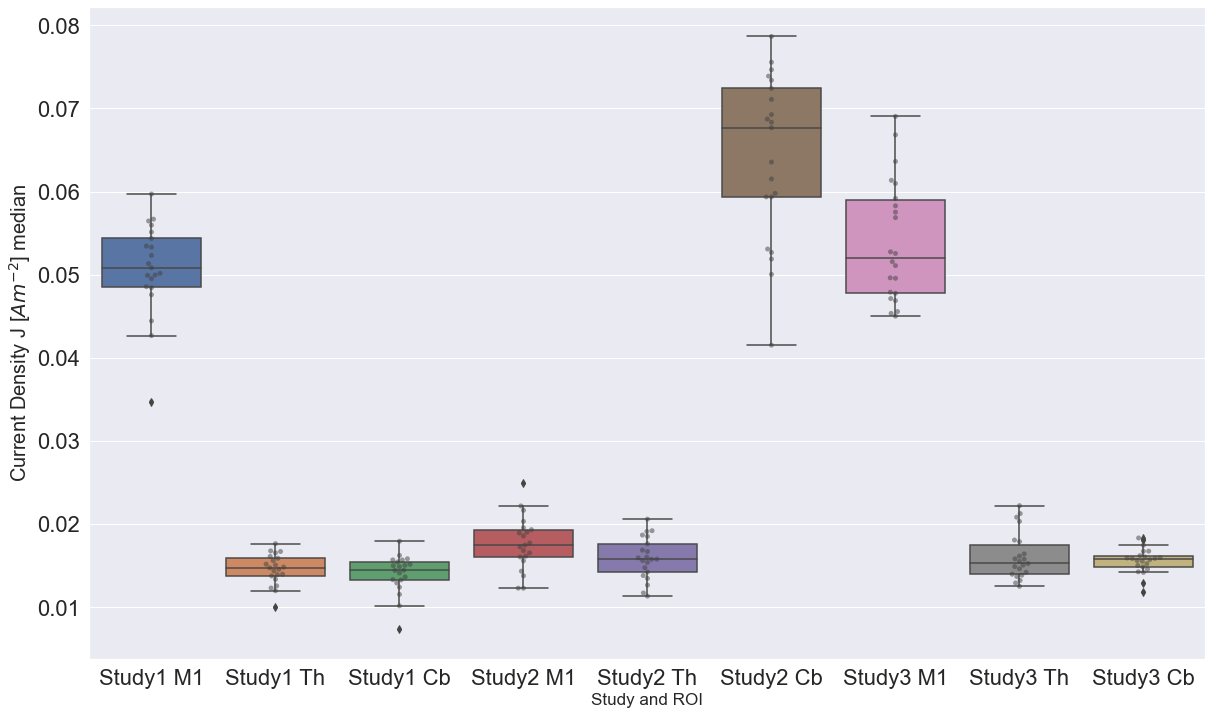

In [41]:
    
db = pd.read_csv(results_folder + 'wp_all_current_density_results.csv')
#db.drop('Unnamed: 0', axis = 1, inplace = True)
#db.drop('m1_max', axis = 1, inplace = True)
#db.drop('cb_max', axis = 1, inplace = True)
#db.drop('th_max', axis = 1, inplace = True)

#db.rename(columns={"m1_medians": "M1", "th_medians": "Th", "cb_medians": "Cb"}, inplace = True)

sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(db))
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(db), color=".25", alpha=0.5)
ax.set_xlabel("Study and ROI", fontsize = 17)
ax.set_ylabel("Current Density J [$Am^{-2}$] median", fontsize = 20)
